## Homework

This week we are going to use a new data set which contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. 

In [1]:
import pandas as pd
oj = pd.read_csv('data/OJ.csv')
print oj.shape
oj.head()

(1070, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [2]:
oj.data = oj.iloc[:, 1:]
oj.target = oj.iloc[:, 0]

The features and the target variable are already prepared for you. What you are going to do is:

**1. Split**

Split the data set into two parts: training set and test set(with *random_state=0*, and *test_size=1.0/2*).


In [3]:
### your solution
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(oj.data, oj.target, random_state=0, test_size=1.0/2)

**2. Support vector machine**

(1) Fit a svm model on the training set, report the training error and test error.(Just use the **svm.SVC** with default setting.)
    
(2) Change the value of parameter $C$ from $10^{-3}$ to $10^3$, make a plot to watch how the training error and test error varies. You can choose the value of $C$ from the array `np.logspace(-3, 3, 300)`.

The training error is: 0.22617
The test     error is: 0.30280
---------------------------------------------------------------------------
{'C': 45.239562325380582}
Populating the interactive namespace from numpy and matplotlib


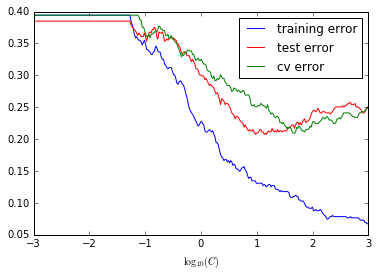

In [11]:
### your solution
def get_error(x_train, y_train, x_test, y_test, model, show = True):
    model.fit(x_train, y_train)
    train_error = 1 - model.score(x_train, y_train)
    test_error = 1 - model.score(x_test, y_test)
    if show:
        print "The training error is: %.5f" %train_error 
        print "The test     error is: %.5f" %test_error
    return [train_error, test_error]

# (1)
from sklearn import svm
svm_model = svm.SVC()
get_error(train_data, train_target, test_data, test_target, svm_model)

print '-'*75

#(2)
import numpy as np
C = np.logspace(-3, 3, 300)
svm_train = []
svm_test = []
for i in C:
    svm_model.set_params(C = i)
    error = get_error(train_data, train_target, test_data, test_target, svm_model, show=False)
    svm_train.append(error[0])
    svm_test.append(error[1])

    
# >>>>>>> Let's use grid_search and compare the result <<<<<<<<<<<<    
from sklearn import grid_search as gs
grid_para_svm = {'C': np.logspace(-3, 3, 300)}
grid_search_svm = gs.GridSearchCV(svm_model, grid_para_svm)
grid_search_svm.fit(train_data, train_target)
print grid_search_svm.best_params_
scores = np.array([1- scores.mean_validation_score for scores in grid_search_svm.grid_scores_])
#####################################################################    

%pylab inline
import matplotlib.pyplot as pl
pl.plot(np.log10(C), svm_train, c = 'blue', label='training error')
pl.plot(np.log10(C), svm_test, c = 'red', label='test error')
pl.plot(np.log10(C), scores, c='green', label='cv error')
pl.legend()
pl.xlabel('$\log_{10}(C)$')
pl.show()

**3. Decision tree**

(1) Fit a decision tree model on the training set with the default setting.
    
(2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.
    
(3) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [13]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

(4) What are the first 5 important features?

In [15]:
### your solution
# (1)
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
get_error(train_data, train_target, test_data, test_target, tree_model)

The training error is: 0.00748
The test     error is: 0.24486


[0.0074766355140186702, 0.2448598130841122]

Populating the interactive namespace from numpy and matplotlib


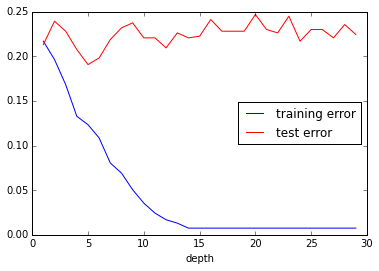

In [16]:
# (2)
depth  = range(1, 30)
tree_train = []
tree_test = []
for i in depth:
    tree_model.set_params(max_depth = i)
    error = get_error(train_data, train_target, test_data, test_target, tree_model, show=False)
    tree_train.append(error[0])
    tree_test.append(error[1])

%pylab inline
import matplotlib.pyplot as pl
pl.plot(depth, tree_train, c = 'blue', label='training error')
pl.plot(depth, tree_test, c = 'red', label='test error')
pl.legend(loc=7)
pl.xlabel('depth')
pl.show()

# The plot below indicates depth = 5 results in the lowest test error

In [18]:
# (3)
import sklearn.grid_search as gs 

grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}
grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy').fit(train_data, train_target)
print 'The best score is %.4f' %grid_search_tree.best_score_
print 'The training error is %.4f' %(1 - grid_search_tree.best_estimator_.score(train_data, train_target))
print 'The testing error is %.4f' %(1 - grid_search_tree.best_estimator_.score(test_data, test_target))

The best score is 0.8150
The training error is 0.1757
The testing error is 0.2206


In [30]:
tree_final = grid_search_tree.best_estimator_
feature_imprtance = zip(oj.columns[1:], tree_final.feature_importances_)
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_imprtance = np.array(feature_imprtance, dtype = dtype)
feature_sort = np.sort(feature_imprtance, order='importance')[::-1]
feature_sort

array([('LoyalCH', 0.7994058166234773), ('PriceDiff', 0.1146968210189287),
       ('SalePriceC', 0.03351325593979553),
       ('SpecialCH', 0.02832348525941605),
       ('WeekofPurc', 0.024060621158382475), ('StoreID', 0.0),
       ('Store7', 0.0), ('SpecialMM', 0.0), ('SalePriceM', 0.0),
       ('STORE', 0.0), ('PriceMM', 0.0), ('PriceCH', 0.0),
       ('PctDiscMM', 0.0), ('PctDiscCH', 0.0), ('ListPriceD', 0.0),
       ('DiscMM', 0.0), ('DiscCH', 0.0)], 
      dtype=[('feature', 'S10'), ('importance', '<f8')])

**4. Random Forest.**

(1) Fit a random forest on the training set. Report the training error and test error.
    
(2) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [ ]:
grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}

(3) What's the first 5 important features?

In [23]:
### your solution
# (1)
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
get_error(train_data, train_target, test_data, test_target, randomForest)

The training error is: 0.02617
The test     error is: 0.24299


[0.026168224299065401, 0.2429906542056075]

In [24]:
grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, cv=5, scoring='accuracy').fit(train_data, train_target)

print 'The best score is %.4f' %grid_search_forest.best_score_
print 'The best parameters are %s' %grid_search_forest.best_params_
print 'The training error is %.4f' %(1 - grid_search_forest.best_estimator_.score(train_data, train_target))
print 'The testing error is %.4f' %(1 - grid_search_forest.best_estimator_.score(test_data, test_target))

The best score is 0.8206
The best parameters are {'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 4}
The training error is 0.1290
The testing error is 0.1869


In [31]:
# (3)
forest_final = grid_search_forest.best_estimator_
feature_imprtance = zip(oj.columns[1:], forest_final.feature_importances_)
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_imprtance = np.array(feature_imprtance, dtype = dtype)
feature_sort = np.sort(feature_imprtance, order='importance')[::-1]
feature_sort

array([('LoyalCH', 0.5026584177923463), ('PriceDiff', 0.07969655125534468),
       ('STORE', 0.07249977139916942), ('SalePriceM', 0.05158076856974129),
       ('ListPriceD', 0.04459604340327929),
       ('StoreID', 0.04333734105233966), ('PriceMM', 0.03844591494565467),
       ('WeekofPurc', 0.032609062956526075),
       ('PctDiscMM', 0.026465470531021787),
       ('PriceCH', 0.02158010055072562), ('DiscMM', 0.02154708964702606),
       ('SalePriceC', 0.021252601864962344),
       ('Store7', 0.018840801128107033), ('DiscCH', 0.011820092991100472),
       ('PctDiscCH', 0.005789034939461342),
       ('SpecialCH', 0.004983965398024689),
       ('SpecialMM', 0.0022969715751693528)], 
      dtype=[('feature', 'S10'), ('importance', '<f8')])